# League of Legends Match Outcome Analysis #

## Motivation: ##

This project is motivated by my own love for Riot Games' beloved MOBA (multiplayer online battle arena) game, League of Legends. A LoL game, on average, lasts about 40 minutes so I wanted to analyze this dataset to answer the question:

- **How important are the first 10 minutes of a League of Legends game in determining the outcome of the game?**

Besides answering the question, the goal of this project is also to become a better storyteller with data. I want to present my insights in a clear, concise manner and make sure that my analysis is deliberate and focused on answering interesting questions that emerge from the dataset instead of straying towards fancy techniques.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
data = pd.read_csv("high_diamond_ranked_10min.csv")
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [20]:
data.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

## Dataset Description ##
Before I move further, I want to take a second to explain the data available in the dataset:
- blueWins: Whether or not blue team won (0 if red won, 1 if blue won)
- blueWardsPlaced: Wards placed by the blue team. Wards allow players to detect enemies hiding in bushes.
- blueWardsDestroyed: Enemy (red team) wards destroyed by the blue team.
- blueFirstBlood: Whether or not Blue team got the first kill of the game.
- blueKills: Number of blue team kills.
- blueDeaths: Number of blue team deaths.
- blueAssists: Number of blue team assists. 
- blueEliteMonsters: Heralds and dragons killed by the blue team.
- blueDragons: Dragons killed by the blue team can only be 1 or 0 since only one dragon has spawned 10 minutes into the game.
- blueHeralds: Heralds killed by the blue team. Once again, it can only be max 1 since herald has only spawned once ten minutes into the game.
- blueTowersDestroyed: Number of blue towers that have been destroyed so far. There are 9 total, 3 in each lane.
- blueTotalGold: Total gold by the blue team (Gold is farmed by killing minions and jungle monsters.)
- blueAvgLevel: Average level of blue team players.
- blueTotalExperience: Total blue team XP.
- blueTotalMinionsKilled: Number of minions killed by Blue Team.
- blueTotalJungleMinionsKilled: Number of Jungle monsters killed by Blue team.
- blueGoldDiff: Gold difference between teams.
- blueExperienceDiff: XP difference between teams.
- blueCSpermin: Rate of minion kills by blue team.
- blueGoldpermin: Rate of gold farming by blue team.

Same metrics are also available for the Red team.

In [21]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


## Exploratory Data Analysis ##

Below I have plotted histograms for continuous features for both teams. The distributions have been grouped by which team won.

C:\Users\laiba\AppData\Local\Temp\ipykernel_16560\921535911.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(h_pad=2)


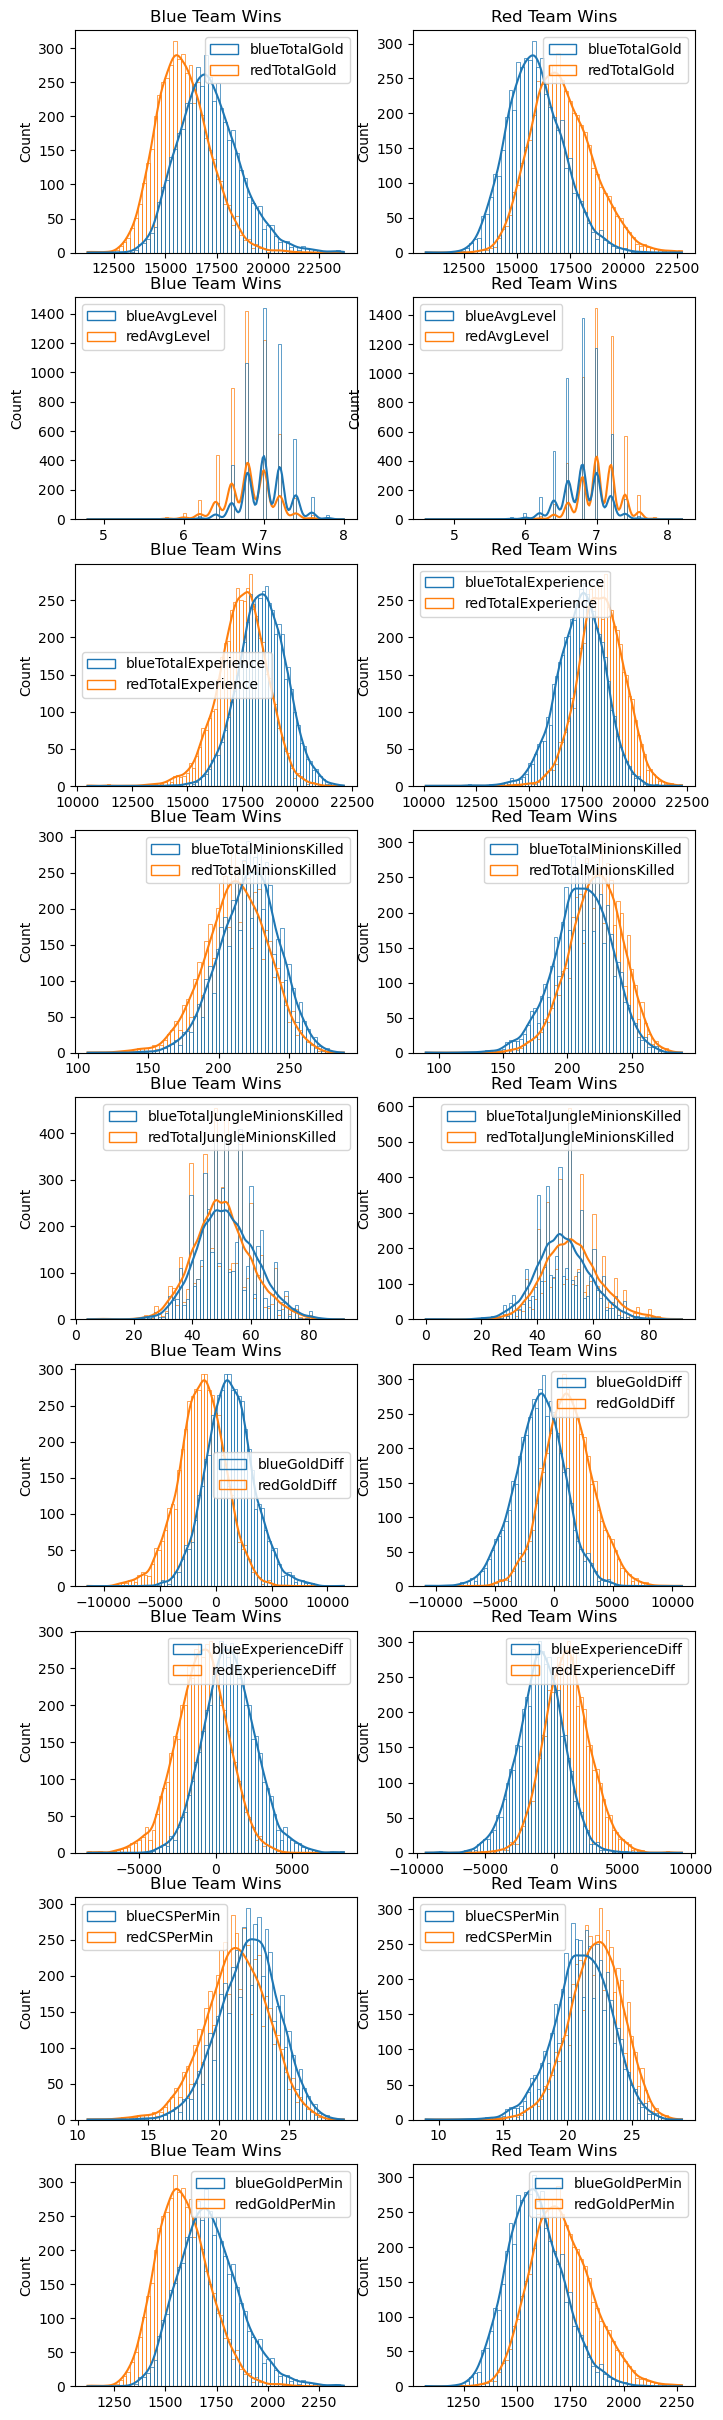

In [22]:
fig, ax = plt.subplots(9,2,figsize=(8,4))
columns = ['TotalGold', 'AvgLevel', 'TotalExperience', \
           'TotalMinionsKilled','TotalJungleMinionsKilled', 'GoldDiff', \
           'ExperienceDiff','CSPerMin', 'GoldPerMin']

for i in columns:
    temp_1 = data[data["blueWins"] == 1][[str("blue" + i),str("red" + i)]]
    temp_2 = data[data["blueWins"] == 0][[str("blue" + i),str("red" + i)]]
    sns.histplot(data=temp_1.squeeze(), kde=True,\
                 label=str("Blue Team Wins: " + i), fill=False, ax=ax[columns.index(i)][0])
    ax[columns.index(i)][0].set_title("Blue Team Wins")
    sns.histplot(data=temp_2.squeeze(), kde=True, \
                 label=str("Red Team Wins: " + i), fill=False, ax=ax[columns.index(i)][1])
    ax[columns.index(i)][1].set_title("Red Team Wins")
fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=6)
plt.show()

I found these charts really interesting. Firstly, it's clear that the distributions are almost exactly opposite for each feature depending on which team won. So for the first graph, in the games in which Blue team won, Blue team's gold is on average much higher than Red team's in just the first 10 minutes. And in the games in which Red team won, their Gold follows the exact same distribution as Blue Team's did in the games Blue team won. **This appears to be true for every single feature!** 

This would suggest that the game's outcome might be obvious after just the first 10 minutes. So, can a team make a comeback despite poor performance in the first 10 minutes of the game?

I looked at matches in which a team performed poorly in the first 10 minutes of the game but still managed to win. To determine if a team is performing poorly or not, I just focused on 2 features: GoldDiff and ExperienceDiff. Since gold is farmed by killing minions, enemy players and jungle monsters and same for Experience, these metrics best capture overall performance.

In [23]:
performed_poorly_won = data[((((data["blueGoldDiff"] < 0) & (data["blueExperienceDiff"] < 0)) \
                 & (data["blueWins"] == 1)) | \
                (((data["redGoldDiff"] < 0) & (data["redExperienceDiff"] < 0)) \
                 & (data["blueWins"] == 0)))].copy()

performed_poorly_lost = data[((((data["blueGoldDiff"] < 0) & (data["blueExperienceDiff"] < 0)) \
                 & (data["blueWins"] == 0)) | \
                (((data["redGoldDiff"] < 0) & (data["redExperienceDiff"] < 0)) \
                 & (data["blueWins"] == 1)))].copy()

performed_well_won = data[((((data["blueGoldDiff"] > 0) & (data["blueExperienceDiff"] > 0)) \
                 & (data["blueWins"] == 1)) | \
                (((data["redGoldDiff"] > 0) & (data["redExperienceDiff"] > 0)) \
                 & (data["blueWins"] == 0)))].copy()

performed_well_lost = data[((((data["blueGoldDiff"] > 0) & (data["blueExperienceDiff"] > 0)) \
                 & (data["blueWins"] == 0)) | \
                (((data["redGoldDiff"] > 0) & (data["redExperienceDiff"] > 0)) \
                 & (data["blueWins"] == 1)))].copy()

print("Teams that performed poorly and lost: ",performed_poorly_lost.shape[0])
print("Teams that performed poorly but still won: ",performed_poorly_won.shape[0])
print("Teams that performed well but still lost: ",performed_well_lost.shape[0])
print("Teams that performed well and won: ",performed_well_won.shape[0])

Teams that performed poorly and lost:  6347
Teams that performed poorly but still won:  2042
Teams that performed well but still lost:  2042
Teams that performed well and won:  6347


In [24]:
print(data.shape)
print(6347+2042)

(9879, 40)
8389


In [25]:
performed_poorly_lost["group"] = "Performed_Poorly_And_Lost"
performed_poorly_lost["focus_team"] = np.where((performed_poorly_lost['blueWins'] == 0), \
                                               "Blue", "Red")
performed_poorly_won["group"] = "Performed_Poorly_And_Won"
performed_poorly_won["focus_team"] = np.where((performed_poorly_won['blueWins'] == 1), \
                                               "Blue", "Red")

df = pd.concat([performed_poorly_lost, performed_poorly_won], axis=0)
df.shape

(8389, 42)

In [26]:
df_new = pd.DataFrame()

In [27]:
df_new = pd.DataFrame()
df_new['gameId'] = df['gameId']
df_new['focus_team'] = df['focus_team']
df_new['group'] = df['group']
columns = ['FirstBlood','WardsPlaced', 'WardsDestroyed',
       'Kills', 'Deaths', 'Assists',
       'EliteMonsters', 'Dragons', 'Heralds',
       'TowersDestroyed', 'TotalGold', 'AvgLevel',
       'TotalExperience', 'TotalMinionsKilled',
       'TotalJungleMinionsKilled', 'GoldDiff', 'ExperienceDiff',
       'CSPerMin', 'GoldPerMin']
for i in columns:
    df_new[i] = np.where((df['focus_team'] == "Red"), df[str('red'+i)], df[str('blue'+i)])


df_new = df_new.drop(['focus_team'],axis=1)

In [28]:
df_new.head()


,gameId,group,FirstBlood,WardsPlaced,WardsDestroyed,Kills,Deaths,Assists,EliteMonsters,Dragons,...,TowersDestroyed,TotalGold,AvgLevel,TotalExperience,TotalMinionsKilled,TotalJungleMinionsKilled,GoldDiff,ExperienceDiff,CSPerMin,GoldPerMin
1,4523371949,Performed_Poorly_And_Lost,0,12,1,5,5,5,0,0,...,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,Performed_Poorly_And_Lost,0,15,0,7,11,4,1,1,...,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,Performed_Poorly_And_Lost,0,43,1,4,5,5,1,0,...,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
5,4475365709,Performed_Poorly_And_Lost,1,36,5,3,5,2,0,0,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,Performed_Poorly_And_Lost,0,57,1,6,7,9,0,0,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3


C:\Users\laiba\AppData\Local\Temp\ipykernel_16560\956222937.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(h_pad=2)


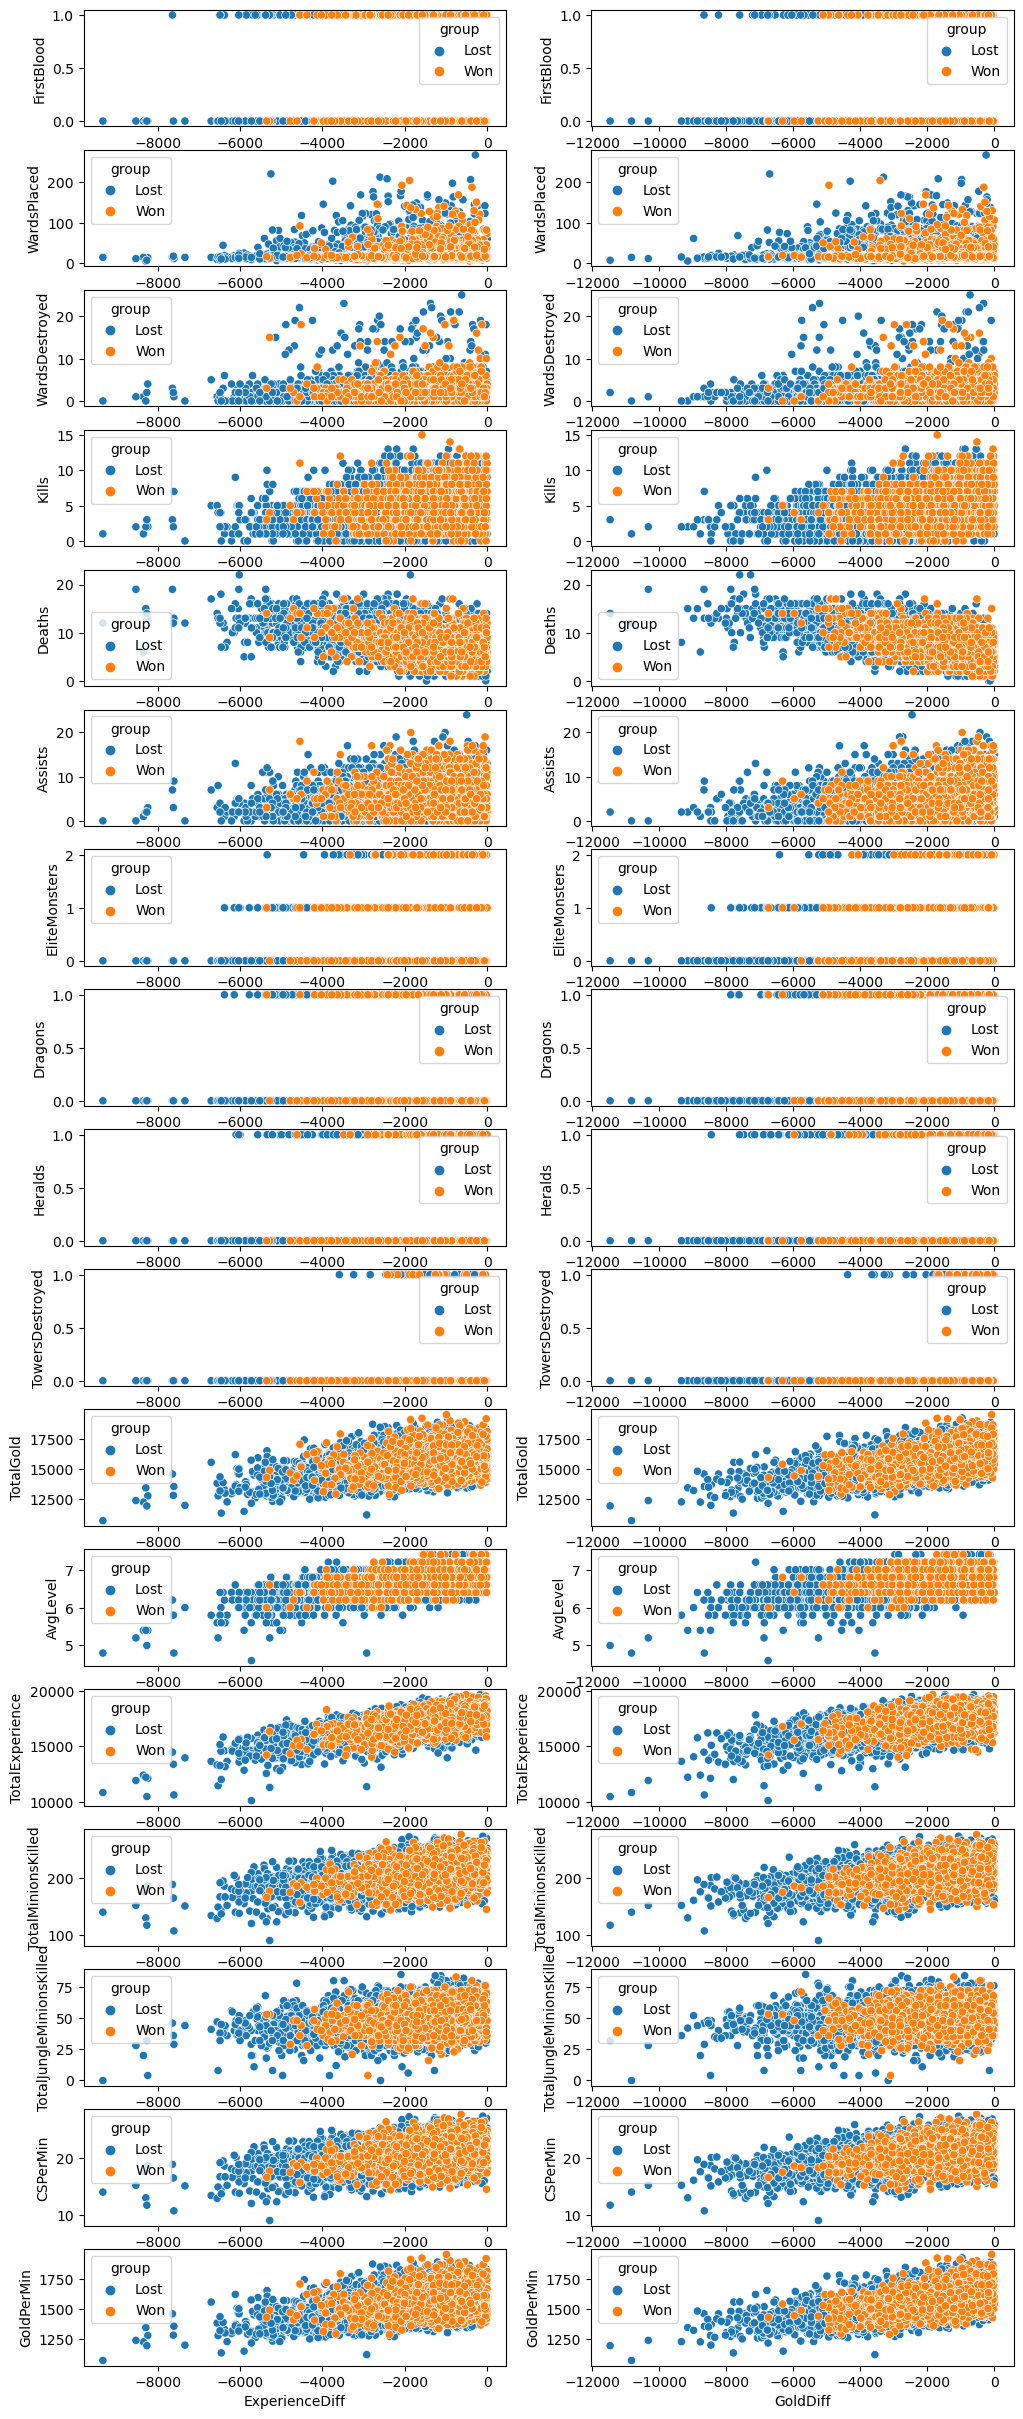

In [29]:
fig, ax = plt.subplots(17,2,figsize=(12,4))
columns = ['FirstBlood','WardsPlaced', 'WardsDestroyed','Kills', 'Deaths', 'Assists', \
       'EliteMonsters', 'Dragons', 'Heralds', 'TowersDestroyed', 'TotalGold', \
           'AvgLevel','TotalExperience', 'TotalMinionsKilled','TotalJungleMinionsKilled',\
       'CSPerMin', 'GoldPerMin']
df_new['group'] = np.where((df_new['group'] == 'Performed_Poorly_And_Lost'), 'Lost', 'Won')
for i in columns:
    sns.scatterplot(data=df_new, x="ExperienceDiff", y=i, hue="group", \
                    ax=ax[columns.index(i)][0])
    sns.scatterplot(data=df_new, x="GoldDiff", y=i, hue="group", \
                    ax=ax[columns.index(i)][1])
    ax[columns.index(i)][0].set_xlabel("ExperienceDiff")
    ax[columns.index(i)][1].set_xlabel("GoldDiff")
fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=6)
plt.show()
    
    